In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [8]:
book = pd.read_csv('book.csv', encoding="ISO-8859-1")
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [9]:
book.drop('Unnamed: 0', axis=1, inplace=True)
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [10]:
len(book['User.ID'].unique())

2182

In [11]:
len(book['Book.Title'].unique())

9659

In [12]:
book[book.duplicated]

,User.ID,Book.Title,Book.Rating
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [13]:
book = book.drop_duplicates()
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [14]:
book.shape

(9998, 3)

In [15]:
(book.groupby(['Book.Title','User.ID'])['Book.Rating'].first().unstack())

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Book.Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Stories;Merril;1985;McClelland &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repairing PC Drives &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Well, there's your problem\: Cartoons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [16]:
#user_book = book.pivot(index='User.ID',
#                      columns='Book.Title',
#                       values='Book.Rating').reset_index(drop=False)

In [17]:
book.fillna(0, inplace=True)
book

/var/folders/k4/zgzvg98s73zgn3vhrcp2bhz80000gp/T/ipykernel_6277/2481333145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book.fillna(0, inplace=True)


,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [18]:
#calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [19]:
book1 = book
book1

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [20]:
book1.drop('Book.Title', axis=1,inplace =True)
book1

/var/folders/k4/zgzvg98s73zgn3vhrcp2bhz80000gp/T/ipykernel_6277/2319086577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book1.drop('Book.Title', axis=1,inplace =True)


,User.ID,Book.Rating
0,276726,5
1,276729,3
2,276729,6
3,276736,8
4,276737,6
...,...,...
9995,162121,7
9996,162121,9
9997,162121,7
9998,162121,8


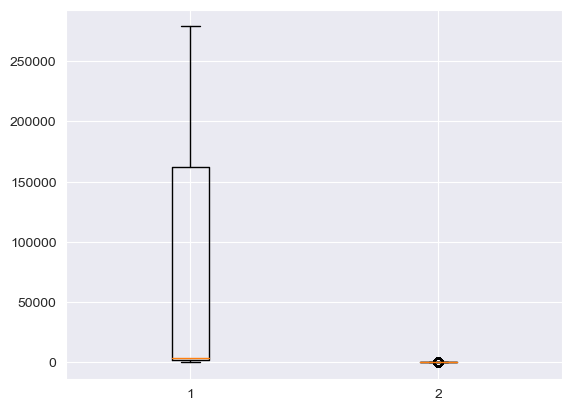

In [37]:
plt.boxplot(book1)
plt.show()           # Shows no outliers in the data

In [38]:
user_sim = 1 - pairwise_distances(book.values,metric='cosine')
user_sim

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [39]:
user_sim_df = pd.DataFrame(user_sim)

In [40]:
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [41]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0


In [42]:
user_sim_df.idxmax(axis=1)[0:10]

0    15
1    19
2     4
3     9
4     2
5    10
6    41
7     8
8     7
9     3
dtype: int64

In [43]:
book1[(book1['User.ID']==276726) | (book1['User.ID']==276737)]

,User.ID,Book.Rating
0,276726,5
4,276737,6


In [44]:
book1[(book1['User.ID']==162121) | (book1['User.ID']==162129)]

,User.ID,Book.Rating
9990,162121,7
9991,162121,5
9992,162121,8
9993,162121,8
9994,162121,8
9995,162121,7
9996,162121,9
9997,162121,7
9998,162121,8
9999,162129,6


In [45]:
user_1=book[book['User.ID']==162129]
user_1

,User.ID,Book.Rating
9999,162129,6


In [46]:
user_2=book[book['User.ID']==162121]
user_2

,User.ID,Book.Rating
9990,162121,7
9991,162121,5
9992,162121,8
9993,162121,8
9994,162121,8
9995,162121,7
9996,162121,9
9997,162121,7
9998,162121,8


# Scatterplot between variables along with histograms`

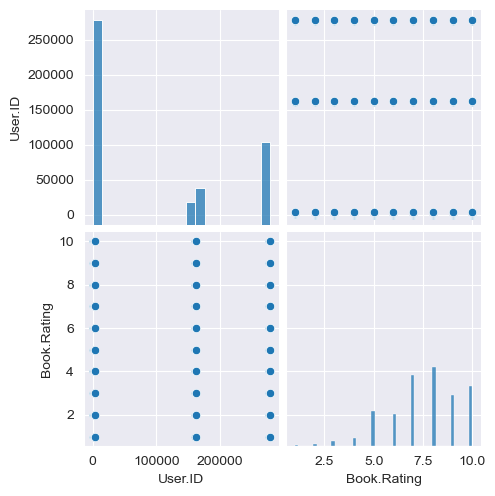

In [47]:
sns.set_style(style='darkgrid')
sns.pairplot(book1)

# Test for normality of residuals (Q-Qplot)

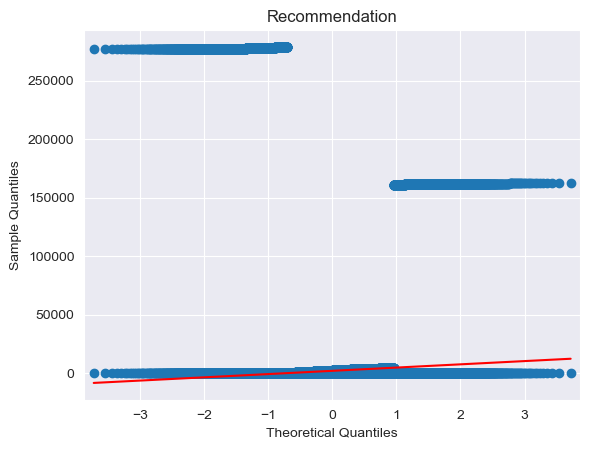

In [48]:
import statsmodels.api as sm
qqplot=sm.qqplot(book1, line='q')
plt.title('Recommendation')
plt.show()